In [1]:
import pandas as pd

# Обработка файла

In [2]:
text = []
with open('nfcapd.txt', 'r', encoding='utf_8') as f:
    text = f.readlines()

In [3]:
spaces = [' '*n for n in range(20, 2, -1)]

In [4]:
for i in range(len(text)):
    text[i] = text[i].replace('->', '')

words = ['INVALID', 'XEvent', 'Ignore']
for word in words:
    for i in range(len(text)):
        text[i] = text[i].replace(word, ' ' + word + ' ')

for space in spaces:
    for i in range(len(text)):
        text[i] = text[i].replace(space, '  ')
            
for i in range(len(text)):
    text[i] = text[i].replace('  ', ',')
        
text[:10]

['Date first seen,Event,XEvent,Proto,Src IP Addr:Port,Dst IP Addr:Port,X-Src IP Addr:Port,X-Dst IP Addr:Port,In Byte,Out Byte\n',
 '2020-02-25 11:21:06.190,INVALID,Ignore,TCP,192.168.250.3:80,23.226.231.226:3682,0.0.0.0:0,0.0.0.0:0,572,0\n',
 '2020-02-25 11:28:30.860,INVALID,Ignore,TCP,192.168.250.50:61137,40.114.211.99:443,0.0.0.0:0,0.0.0.0:0,2241,0\n',
 '2020-02-25 11:29:30.210,INVALID,Ignore,TCP,192.168.250.3:80,23.226.231.226:28857,0.0.0.0:0,0.0.0.0:0,308,0\n',
 '2020-02-25 11:30:01.860,INVALID,Ignore,UDP,192.168.250.62:58474,192.168.250.1:123,0.0.0.0:0,0.0.0.0:0,152,0\n',
 '2020-02-25 11:30:01.860,INVALID,Ignore,UDP,192.168.250.1:123,192.168.250.62:58474,0.0.0.0:0,0.0.0.0:0,152,0\n',
 '2020-02-25 11:30:02.530,INVALID,Ignore,UDP,192.168.250.50:62595,192.168.250.1:53,0.0.0.0:0,0.0.0.0:0,132,0\n',
 '2020-02-25 11:30:02.540,INVALID,Ignore,UDP,192.168.250.1:53,192.168.250.50:62595,0.0.0.0:0,0.0.0.0:0,450,0\n',
 '2020-02-25 11:30:02.540,INVALID,Ignore,UDP,192.168.250.50:62596,173.194.73

In [5]:
with open('new_nfcapd.txt', 'w', encoding='utf_8') as f:
    f.writelines(text)

In [6]:
df = pd.read_csv('new_nfcapd.txt', sep=',')
df

,Date first seen,Event,XEvent,Proto,Src IP Addr:Port,Dst IP Addr:Port,X-Src IP Addr:Port,X-Dst IP Addr:Port,In Byte,Out Byte
0,2020-02-25 11:21:06.190,INVALID,Ignore,TCP,192.168.250.3:80,23.226.231.226:3682,0.0.0.0:0,0.0.0.0:0,572,0.0
1,2020-02-25 11:28:30.860,INVALID,Ignore,TCP,192.168.250.50:61137,40.114.211.99:443,0.0.0.0:0,0.0.0.0:0,2241,0.0
2,2020-02-25 11:29:30.210,INVALID,Ignore,TCP,192.168.250.3:80,23.226.231.226:28857,0.0.0.0:0,0.0.0.0:0,308,0.0
3,2020-02-25 11:30:01.860,INVALID,Ignore,UDP,192.168.250.62:58474,192.168.250.1:123,0.0.0.0:0,0.0.0.0:0,152,0.0
4,2020-02-25 11:30:01.860,INVALID,Ignore,UDP,192.168.250.1:123,192.168.250.62:58474,0.0.0.0:0,0.0.0.0:0,152,0.0
...,...,...,...,...,...,...,...,...,...,...
17444,2020-02-25 12:28:50.060,INVALID,Ignore,TCP,192.168.250.41:65519,31.13.92.36:443,0.0.0.0:0,0.0.0.0:0,2335,0.0
17445,2020-02-25 12:29:56.770,INVALID,Ignore,TCP,192.168.250.41:49260,17.253.123.201:80,0.0.0.0:0,0.0.0.0:0,737,0.0
17446,2020-02-25 12:29:56.780,INVALID,Ignore,TCP,17.253.123.201:80,217.15.20.194:49260,0.0.0.0:0,0.0.0.0:0,3477,0.0
17447,2020-02-25 12:29:46.030,INVALID,Ignore,TCP,92.118.38.58:42198,217.15.20.194:25,0.0.0.0:0,0.0.0.0:0,1031,0.0


# Вариант 6

### Протарифицировать абонента с IP-адресом 192.168.250.1 с коэффициентом k: 0,5руб/Мб (ЗАМЕНА: 0,5руб/Кб) первые 500Мб (ЗАМЕНА: 500Кб), после каждых последующих 500Мб (ЗАМЕНА: 500Кб) k увеличивается на 0,5руб

In [7]:
total_traffic = df[(df['Src IP Addr:Port'].str.contains('192.168.250.1')) 
                   | (df['Dst IP Addr:Port'].str.contains('192.168.250.1'))].reset_index(drop=True).copy()
total_traffic

,Date first seen,Event,XEvent,Proto,Src IP Addr:Port,Dst IP Addr:Port,X-Src IP Addr:Port,X-Dst IP Addr:Port,In Byte,Out Byte
0,2020-02-25 11:30:01.860,INVALID,Ignore,UDP,192.168.250.62:58474,192.168.250.1:123,0.0.0.0:0,0.0.0.0:0,152,0.0
1,2020-02-25 11:30:01.860,INVALID,Ignore,UDP,192.168.250.1:123,192.168.250.62:58474,0.0.0.0:0,0.0.0.0:0,152,0.0
2,2020-02-25 11:30:02.530,INVALID,Ignore,UDP,192.168.250.50:62595,192.168.250.1:53,0.0.0.0:0,0.0.0.0:0,132,0.0
3,2020-02-25 11:30:02.540,INVALID,Ignore,UDP,192.168.250.1:53,192.168.250.50:62595,0.0.0.0:0,0.0.0.0:0,450,0.0
4,2020-02-25 11:30:02.700,INVALID,Ignore,UDP,192.168.250.50:60512,192.168.250.1:53,0.0.0.0:0,0.0.0.0:0,126,0.0
...,...,...,...,...,...,...,...,...,...,...
7059,2020-02-25 12:29:52.760,INVALID,Ignore,UDP,192.168.250.1:53,192.168.250.3:23089,0.0.0.0:0,0.0.0.0:0,995,0.0
7060,2020-02-25 12:29:52.830,INVALID,Ignore,UDP,192.168.250.41:61875,192.168.250.1:53,0.0.0.0:0,0.0.0.0:0,144,0.0
7061,2020-02-25 12:29:52.860,INVALID,Ignore,UDP,192.168.250.1:53,192.168.250.41:61875,0.0.0.0:0,0.0.0.0:0,768,0.0
7062,2020-02-25 12:29:55.180,INVALID,Ignore,UDP,192.168.250.41:65137,192.168.250.1:53,0.0.0.0:0,0.0.0.0:0,122,0.0


In [8]:
total_traffic['Date first seen'] = total_traffic['Date first seen'].apply(pd.to_datetime).copy()

In [9]:
total_traffic['In Byte'] = total_traffic['In Byte'].apply(
    lambda x: float(x) if x[-1] != 'M' else float(x[:-1]) * 1024 * 1024).copy()
result = sum(total_traffic['In Byte'].values)

In [10]:
result = (result / 1024)

In [11]:
result

6190.453515625

# Отображение графика зависимости объёма трафика от времени

In [12]:
import matplotlib.pyplot as plt

In [13]:
traffic_after_group = (total_traffic.groupby('Date first seen').aggregate(sum)).copy()

In [14]:
traffic_after_group

,In Byte,Out Byte
Date first seen,,
2020-02-25 10:32:54.720,41344.0,0.0
2020-02-25 10:46:21.310,91727.0,0.0
2020-02-25 10:57:23.370,13290.0,0.0
2020-02-25 11:02:25.360,2028.0,0.0
2020-02-25 11:02:25.380,3861.0,0.0
...,...,...
2020-02-25 12:29:52.240,164.0,0.0
2020-02-25 12:29:52.760,1181.0,0.0
2020-02-25 12:29:52.830,144.0,0.0


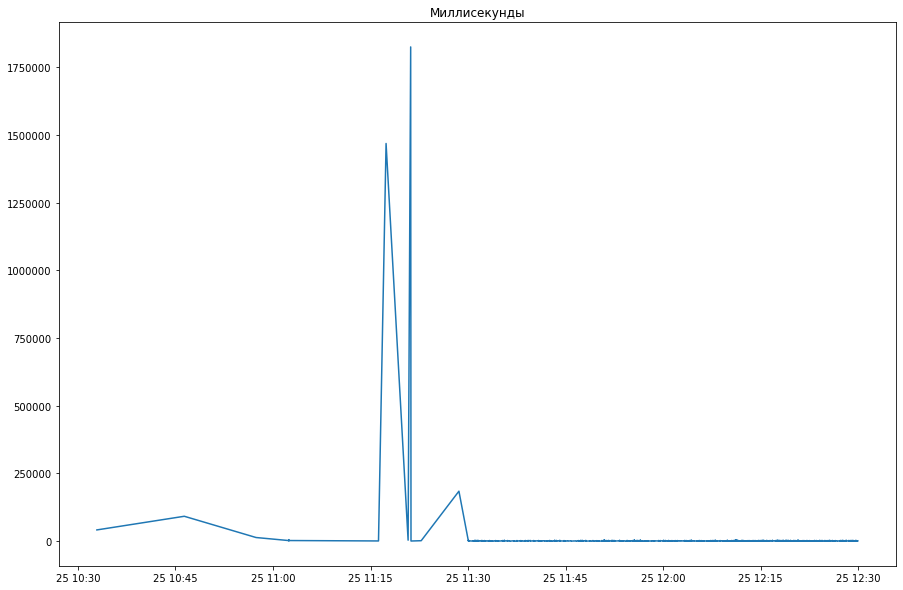

In [15]:
plt.figure(figsize=(15, 10))
plt.title('Миллисекунды')
plt.plot(traffic_after_group.index, traffic_after_group['In Byte'].values)

plt.show()

In [16]:
total_traffic['Date first seen'] = total_traffic['Date first seen'].apply(lambda x: str(x)[:str(x).find('.')]).copy()
total_traffic['Date first seen'] = total_traffic['Date first seen'].apply(pd.to_datetime).copy()
total_traffic

,Date first seen,Event,XEvent,Proto,Src IP Addr:Port,Dst IP Addr:Port,X-Src IP Addr:Port,X-Dst IP Addr:Port,In Byte,Out Byte
0,2020-02-25 11:30:01,INVALID,Ignore,UDP,192.168.250.62:58474,192.168.250.1:123,0.0.0.0:0,0.0.0.0:0,152.0,0.0
1,2020-02-25 11:30:01,INVALID,Ignore,UDP,192.168.250.1:123,192.168.250.62:58474,0.0.0.0:0,0.0.0.0:0,152.0,0.0
2,2020-02-25 11:30:02,INVALID,Ignore,UDP,192.168.250.50:62595,192.168.250.1:53,0.0.0.0:0,0.0.0.0:0,132.0,0.0
3,2020-02-25 11:30:02,INVALID,Ignore,UDP,192.168.250.1:53,192.168.250.50:62595,0.0.0.0:0,0.0.0.0:0,450.0,0.0
4,2020-02-25 11:30:02,INVALID,Ignore,UDP,192.168.250.50:60512,192.168.250.1:53,0.0.0.0:0,0.0.0.0:0,126.0,0.0
...,...,...,...,...,...,...,...,...,...,...
7059,2020-02-25 12:29:52,INVALID,Ignore,UDP,192.168.250.1:53,192.168.250.3:23089,0.0.0.0:0,0.0.0.0:0,995.0,0.0
7060,2020-02-25 12:29:52,INVALID,Ignore,UDP,192.168.250.41:61875,192.168.250.1:53,0.0.0.0:0,0.0.0.0:0,144.0,0.0
7061,2020-02-25 12:29:52,INVALID,Ignore,UDP,192.168.250.1:53,192.168.250.41:61875,0.0.0.0:0,0.0.0.0:0,768.0,0.0
7062,2020-02-25 12:29:55,INVALID,Ignore,UDP,192.168.250.41:65137,192.168.250.1:53,0.0.0.0:0,0.0.0.0:0,122.0,0.0


In [17]:
total_traffic['Date first seen'] = total_traffic['Date first seen'].copy()

In [18]:
traffic_after_group = (total_traffic.groupby('Date first seen').aggregate(sum)).copy()

In [19]:
traffic_after_group

,In Byte,Out Byte
Date first seen,,
2020-02-25 10:32:54,41344.0,0.0
2020-02-25 10:46:21,91727.0,0.0
2020-02-25 10:57:23,13290.0,0.0
2020-02-25 11:02:25,22310.0,0.0
2020-02-25 11:16:13,896.0,0.0
...,...,...
2020-02-25 12:29:45,868.0,0.0
2020-02-25 12:29:46,992.0,0.0
2020-02-25 12:29:47,1898.0,0.0


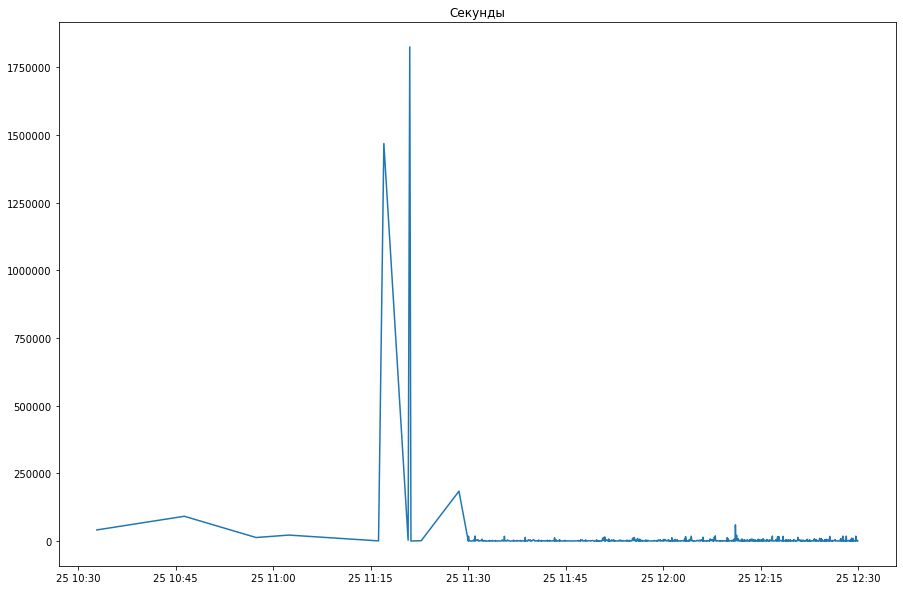

In [20]:
plt.figure(figsize=(15, 10))
plt.title('Секунды')
plt.plot(traffic_after_group.index, traffic_after_group['In Byte'].values)

plt.show()

In [21]:
total_traffic['Date first seen'] = total_traffic['Date first seen'].apply(lambda x: str(x)[:-3]).copy()
total_traffic['Date first seen'] = total_traffic['Date first seen'].apply(pd.to_datetime).copy()
total_traffic

,Date first seen,Event,XEvent,Proto,Src IP Addr:Port,Dst IP Addr:Port,X-Src IP Addr:Port,X-Dst IP Addr:Port,In Byte,Out Byte
0,2020-02-25 11:30:00,INVALID,Ignore,UDP,192.168.250.62:58474,192.168.250.1:123,0.0.0.0:0,0.0.0.0:0,152.0,0.0
1,2020-02-25 11:30:00,INVALID,Ignore,UDP,192.168.250.1:123,192.168.250.62:58474,0.0.0.0:0,0.0.0.0:0,152.0,0.0
2,2020-02-25 11:30:00,INVALID,Ignore,UDP,192.168.250.50:62595,192.168.250.1:53,0.0.0.0:0,0.0.0.0:0,132.0,0.0
3,2020-02-25 11:30:00,INVALID,Ignore,UDP,192.168.250.1:53,192.168.250.50:62595,0.0.0.0:0,0.0.0.0:0,450.0,0.0
4,2020-02-25 11:30:00,INVALID,Ignore,UDP,192.168.250.50:60512,192.168.250.1:53,0.0.0.0:0,0.0.0.0:0,126.0,0.0
...,...,...,...,...,...,...,...,...,...,...
7059,2020-02-25 12:29:00,INVALID,Ignore,UDP,192.168.250.1:53,192.168.250.3:23089,0.0.0.0:0,0.0.0.0:0,995.0,0.0
7060,2020-02-25 12:29:00,INVALID,Ignore,UDP,192.168.250.41:61875,192.168.250.1:53,0.0.0.0:0,0.0.0.0:0,144.0,0.0
7061,2020-02-25 12:29:00,INVALID,Ignore,UDP,192.168.250.1:53,192.168.250.41:61875,0.0.0.0:0,0.0.0.0:0,768.0,0.0
7062,2020-02-25 12:29:00,INVALID,Ignore,UDP,192.168.250.41:65137,192.168.250.1:53,0.0.0.0:0,0.0.0.0:0,122.0,0.0


In [22]:
total_traffic['Date first seen'] = total_traffic['Date first seen'].copy()

In [23]:
traffic_after_group = (total_traffic.groupby('Date first seen').aggregate(sum)).copy()

In [24]:
traffic_after_group

,In Byte,Out Byte
Date first seen,,
2020-02-25 10:32:00,41344.0,0.0
2020-02-25 10:46:00,91727.0,0.0
2020-02-25 10:57:00,13290.0,0.0
2020-02-25 11:02:00,22310.0,0.0
2020-02-25 11:16:00,896.0,0.0
...,...,...
2020-02-25 12:25:00,65405.0,0.0
2020-02-25 12:26:00,21577.0,0.0
2020-02-25 12:27:00,88664.0,0.0


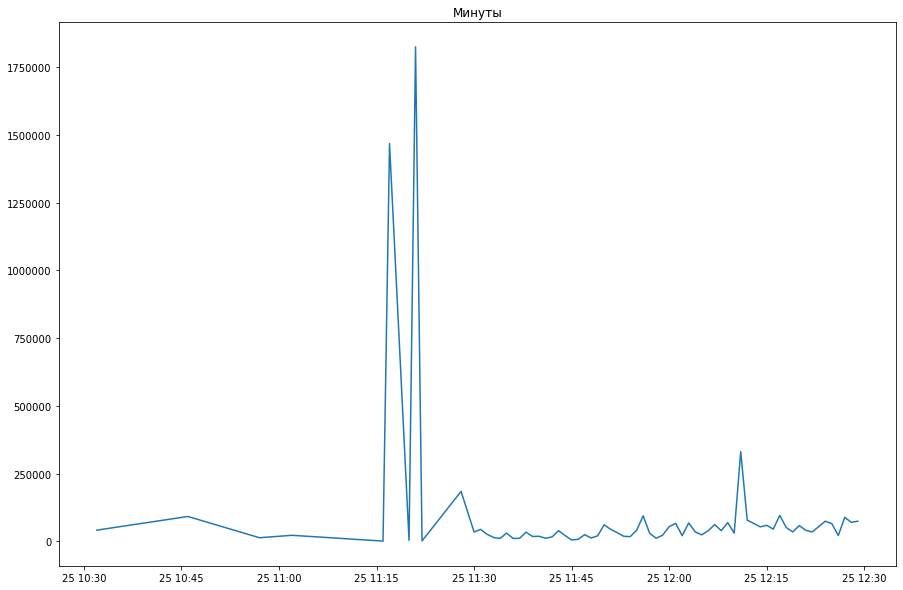

In [25]:
plt.figure(figsize=(15, 10))
plt.title('Минуты')
plt.plot(traffic_after_group.index, traffic_after_group['In Byte'].values)

plt.show()

# Тарификация

In [26]:
total_price = 0
price_per_500 = 0.5

while result > 0:
    total_price += 500 * price_per_500 if result >= 500.0 else result * price_per_500
    
    price_per_500 += 0.5
    result -= 500
    
total_price = round(total_price, 2)

In [27]:
print('Итоговый результат: {}'.format(total_price))

Итоговый результат: 20737.95
